<a href="https://colab.research.google.com/github/vishnupancharatnala/Rebit/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Fraud Detection and User Spending Behavior Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cards_df = pd.read_csv('cards_data.csv')
transactions_df = pd.read_csv('transactions_data.csv')
users_df = pd.read_csv('users_data.csv')

In [ ]:
# transactions has huge amount of data,so we randomly take some part of data and do the proccesing
# select randomly 30% data from transactions_df
transactions_df = transactions_df.sample(frac=0.3)

In [ ]:
cards_df.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [ ]:
cards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [ ]:
cards_df.describe()

,id,client_id,card_number,cvv,num_cards_issued,year_pin_last_changed
count,6146.000000,6146.000000,6.146000e+03,6146.000000,6146.000000,6146.000000
mean,3072.500000,994.939636,4.820426e+15,506.220794,1.503091,2013.436707
std,1774.341709,578.614626,1.328582e+15,289.431123,0.519191,4.270699
min,0.000000,0.000000,3.001055e+14,0.000000,1.000000,2002.000000
25%,1536.250000,492.250000,4.486365e+15,257.000000,1.000000,2010.000000
50%,3072.500000,992.000000,5.108957e+15,516.500000,1.000000,2013.000000
75%,4608.750000,1495.000000,5.585237e+15,756.000000,2.000000,2017.000000
max,6145.000000,1999.000000,6.997197e+15,999.000000,3.000000,2020.000000


In [ ]:
# credit_limit is obejct data type ,we have to numeric
# remove dollar sign at starting by converting to str and removing first char

card_df = cards_df.copy()
# card_df.credit_limit = card_df.credit_limit.astype(str)
# card_df.credit_limit = card_df.credit_limit.replace('$', '')
# removing non numeric values
card_df['credit_limit'] = card_df['credit_limit'].str.replace(r'[^\d\.]', '', regex=True)


# create a function to convert str to numerical
def is_numeric_safe(col):
  try:
    return pd.to_numeric(col)
  except ValueError:
    return np.nan

card_df.credit_limit = card_df.credit_limit.apply(is_numeric_safe)
# card_df['credit_limit'] = pd.to_numeric(card_df['credit_limit'], errors='coerce')


card_df.credit_limit.isnull().sum()


0

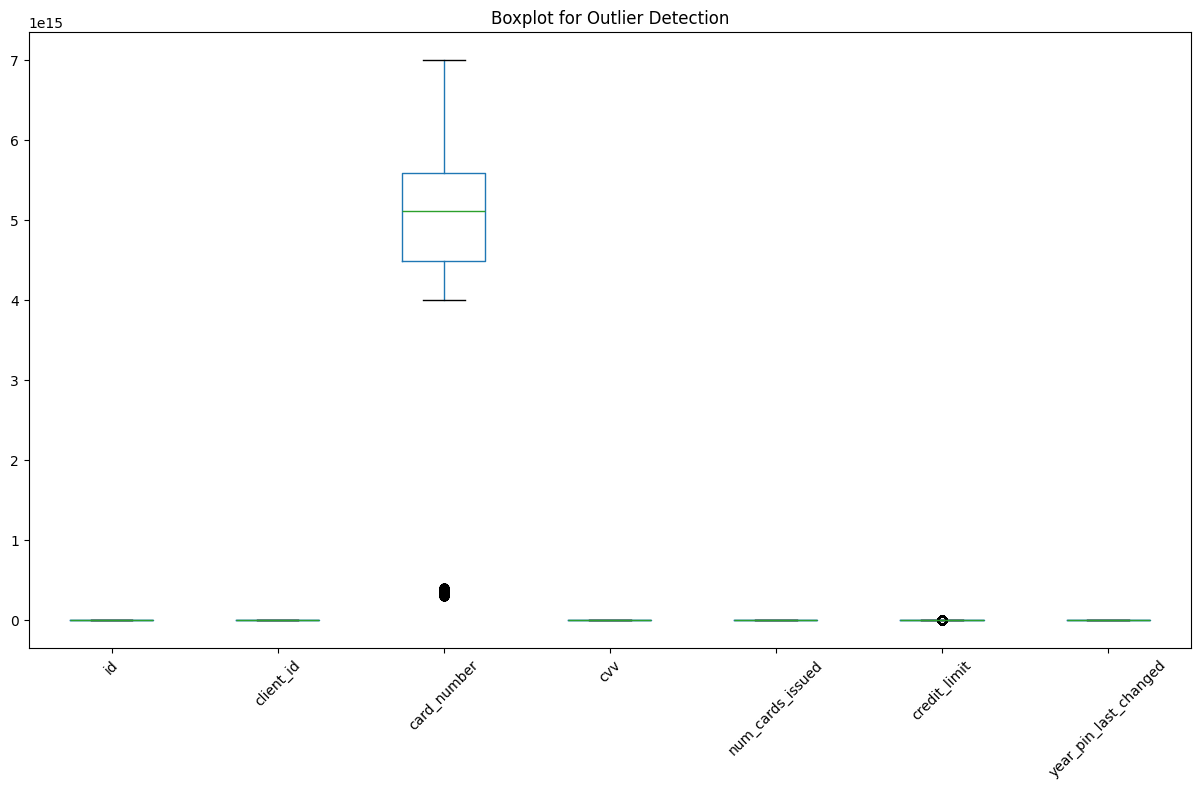

In [ ]:
# outliers in card_df
numeric_columns = card_df.select_dtypes(include='number')
numeric_columns.boxplot(figsize=(15, 8), grid=False, rot=45)

# Show the plot
plt.title("Boxplot for Outlier Detection")
plt.show()

card_number are diff and doesn't contain info.so there is no outlier


###Transactions df

In [ ]:
transactions_df.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
418770,7963014,2010-05-03 18:31:00,932,220,$70.76,Swipe Transaction,10186.0,Cotton Valley,LA,71018.0,5812.0,NaN
201185,7715615,2010-03-02 19:55:00,604,3434,$570.84,Online Transaction,6063.0,ONLINE,NaN,NaN,4511.0,NaN
1015389,8679855,2010-10-24 15:58:00,1776,4938,$-77.00,Swipe Transaction,61195.0,Nashport,OH,43830.0,5541.0,NaN
688838,8286754,2010-07-22 01:12:00,121,5952,$75.55,Swipe Transaction,91717.0,Menasha,WI,54952.0,5912.0,NaN
532277,8099258,2010-06-06 11:40:00,1752,3880,$46.05,Swipe Transaction,42858.0,Abbeville,LA,70510.0,7538.0,NaN


In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330665 entries, 418770 to 389025
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              330665 non-null  int64  
 1   date            330665 non-null  object 
 2   client_id       330665 non-null  int64  
 3   card_id         330665 non-null  int64  
 4   amount          330665 non-null  object 
 5   use_chip        330665 non-null  object 
 6   merchant_id     330665 non-null  float64
 7   merchant_city   330665 non-null  object 
 8   merchant_state  294656 non-null  object 
 9   zip             292720 non-null  float64
 10  mcc             330665 non-null  float64
 11  errors          5314 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 32.8+ MB


In [ ]:
transactions_df.isnull().sum()

,0
id,0
date,0
client_id,0
card_id,0
amount,0
use_chip,0
merchant_id,0
merchant_city,0
merchant_state,36009
zip,37945


In [ ]:
# converting date to date format

transactions_df.date = pd.to_datetime(transactions_df.date)


In [ ]:
transactions_df.merchant_city.value_counts()

,count
merchant_city,
ONLINE,36009
Houston,3800
Miami,2447
Brooklyn,2184
Chicago,2045
...,...
Cave City,1
Kalona,1
Bushnell,1


In [ ]:
# only taking rows with merchant_city is online means payment using online and merchant_state,zip column
transactions_df.loc[transactions_df['merchant_city']=='ONLINE',['merchant_state','zip']]

,merchant_state,zip
201185,NaN,NaN
70611,NaN,NaN
413071,NaN,NaN
988942,NaN,NaN
971906,NaN,NaN
...,...,...
666853,NaN,NaN
138278,NaN,NaN
639824,NaN,NaN
634492,NaN,NaN


In [ ]:
# we have observed that for online transactions merchant_state,zip will be nan
# set merchant_state to online and zip to float value of 000000
transactions_df.loc[transactions_df['merchant_city']=='ONLINE',['merchant_state','zip']] = 'ONLINE',float(000000)
# transactions_df.loc[transactions_df['merchant_city']=='ONLINE',['merchant_state','zip']]
transactions_df.isnull().sum()


,0
id,0
date,0
client_id,0
card_id,0
amount,0
use_chip,0
merchant_id,0
merchant_city,0
merchant_state,0
zip,1936
